# Проект.

<b> Описание проекта. </b>

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Нужно отработать принцип работы с данными. А так же дать прогноз на 2017г.  




<b>Оглавление:</b>

1.Изучение общей информации

2.Подготовка данных

3.Исследовательский анализ данных

4.Портрет пользователя каждого региона

5.Проверка гипотез

6.Общий вывод


## Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
sns.set_style("dark") #Изменили стиль оформления графиков, а именно задний фон теперь серый
pd.set_option("display.max.columns", None) # Теперь все таблицы будут показаны полностью
data = pd.read_csv('games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

In [3]:

data.columns = data.columns.str.lower() #Изменил после комментария ревьюера

#Переименовали столбцы, теперь название столбцов без больших букв.
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод: Year_of_Release - есть значения NaN, не подходящий тип данных, должен быть (int). Name - есть значения NaN.
    Genre - есть значения NaN. Critic_Score - есть значения NaN, не подходящий тип данных, должен быть (int).
    User_Score - есть значения NaN, не подходящий тип данных, должен быть (float). Rating - есть значения NaN.

In [5]:
data['name'] = data['name'].fillna(0)
#Заполняем пропущенные значения нулями
data = data[data['name'] != 0]
#Удаляем значения с нулями из таблицы, так как их очень мало и они не сильно повлияют на данные в общем
#В year_of_release, critic_score, user_score, rating заполнять пропуски а так же менять тип данных не будем, пропусков много и не известно чем их лучше заменить

data.info()
#Проверяем изменения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:
data['rating'].describe()
# всего значений 9949 из 16713
# уникальных значений 8, больше всего значений - Е

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

In [7]:
print(data['rating'].unique())
# Рейтинги ESRB представлены тут в 7 значениях
# RP - означает что рейтинг ожидается.

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [8]:
#Изменено после 2 комментария ревьюера
data['rating'] = data['rating'].fillna('NR')
# Заполняем значения заглушкой,например вымышленное значение NR - not ready

In [9]:
data['rating'].describe()
# Теперь значений 16713 из 16713, мы справились с задачей

count     16713
unique        9
top          NR
freq       6764
Name: rating, dtype: object

In [10]:
#Изменено после 2-го комментария ревьюера
data = data.dropna(subset=['year_of_release'])
#Удаляем пропуски в year_of_release
data['year_of_release'] = data['year_of_release'].astype('int')

In [11]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [13]:
# tbd означает что оценка подлежит уточнению
# изменяем тип данных на float
data['user_score'] = data['user_score'].str.split('tbd').str[0]
                     
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')

#Избавляемся от строчных значений

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [15]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
#Создаем столбец в котором будет сумма продаж по всему миру
data.head()
#Проверяем наличие нового столбца

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


## Исследовательский анализ данных

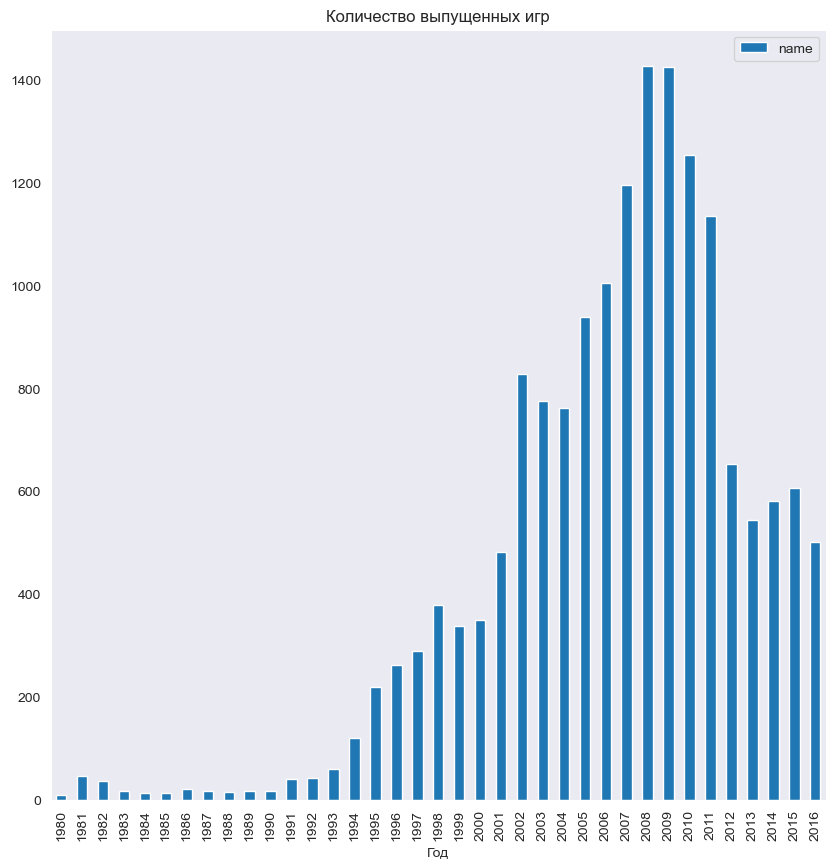

In [16]:
data_pivot_years = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

data_pivot_years = data_pivot_years.sort_values(by = 'year_of_release')
data_pivot_years.plot(kind = 'bar', figsize = (10,10));
plt.title('Количество выпущенных игр');
plt.xlabel('Год');

Вывод: Мы не можем учитывать количество выпущенных игр ране 1994 года, так как выпущенных игр в тегоды ничтожно мало по сравнению с количеством выпущенных игр в последующие годы. Однако если их не учитывать то пострадают данные платформ, будет невозможно определить какие из платформ доминировали в то или иное время.

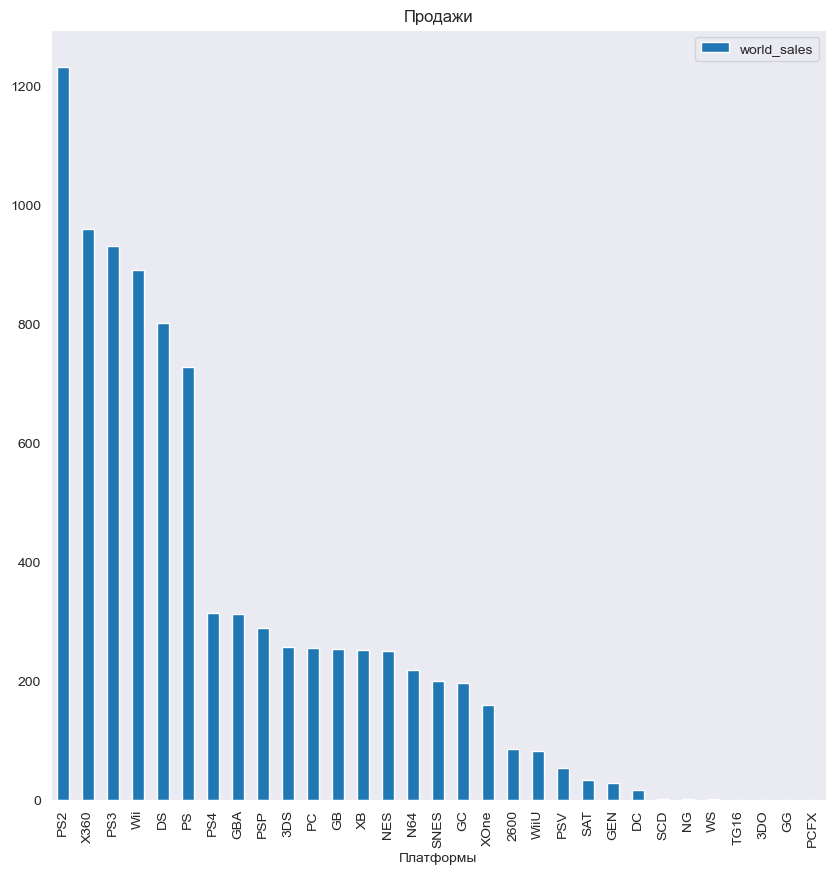

In [17]:
data_pivot = data.pivot_table(index = 'platform', values = 'world_sales', aggfunc = 'sum')
data_pivot = data_pivot.sort_values(by = 'world_sales', ascending = False)
data_pivot.plot(kind = 'bar', figsize = (10,10));
plt.title('Продажи');
plt.xlabel('Платформы');
#Мы можем предположить что самые крупные продажи начинаются от 900

Вывод: Мы видим что в ТОП-5 самых продаваемых платформ в мире входят - PS2,X360,PS3,Wii,DS. 

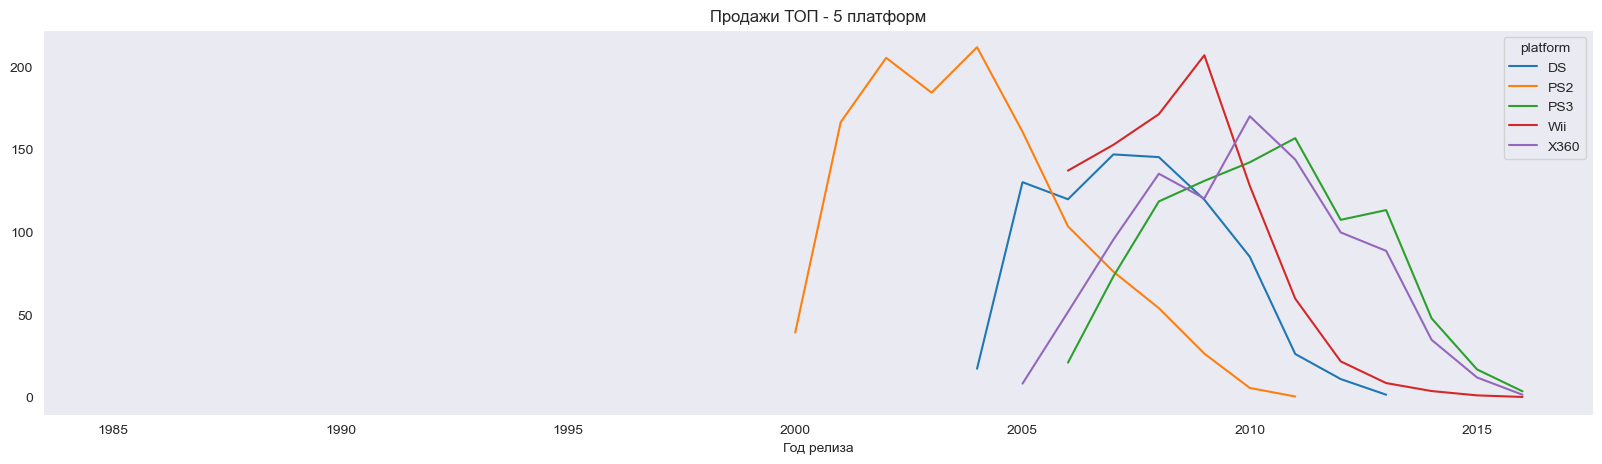

In [18]:
big_platforms = data.query('platform == ["PS2","X360","PS3","Wii","DS"]')
#В этой выборке платформы с самым высоким количеством продаж
big_platforms_pivot = big_platforms.pivot_table(index = 'year_of_release', values = 'world_sales',columns = 'platform', aggfunc = 'sum')
big_platforms_pivot.plot(figsize = (20,5));
plt.title('Продажи ТОП - 5 платформ');
plt.xlabel('Год релиза');

Вывод: Судя по графику платформа в среднем "живет" около 7ми лет, затем продажи значительно сокращаются и не выдерживают конкуренции.

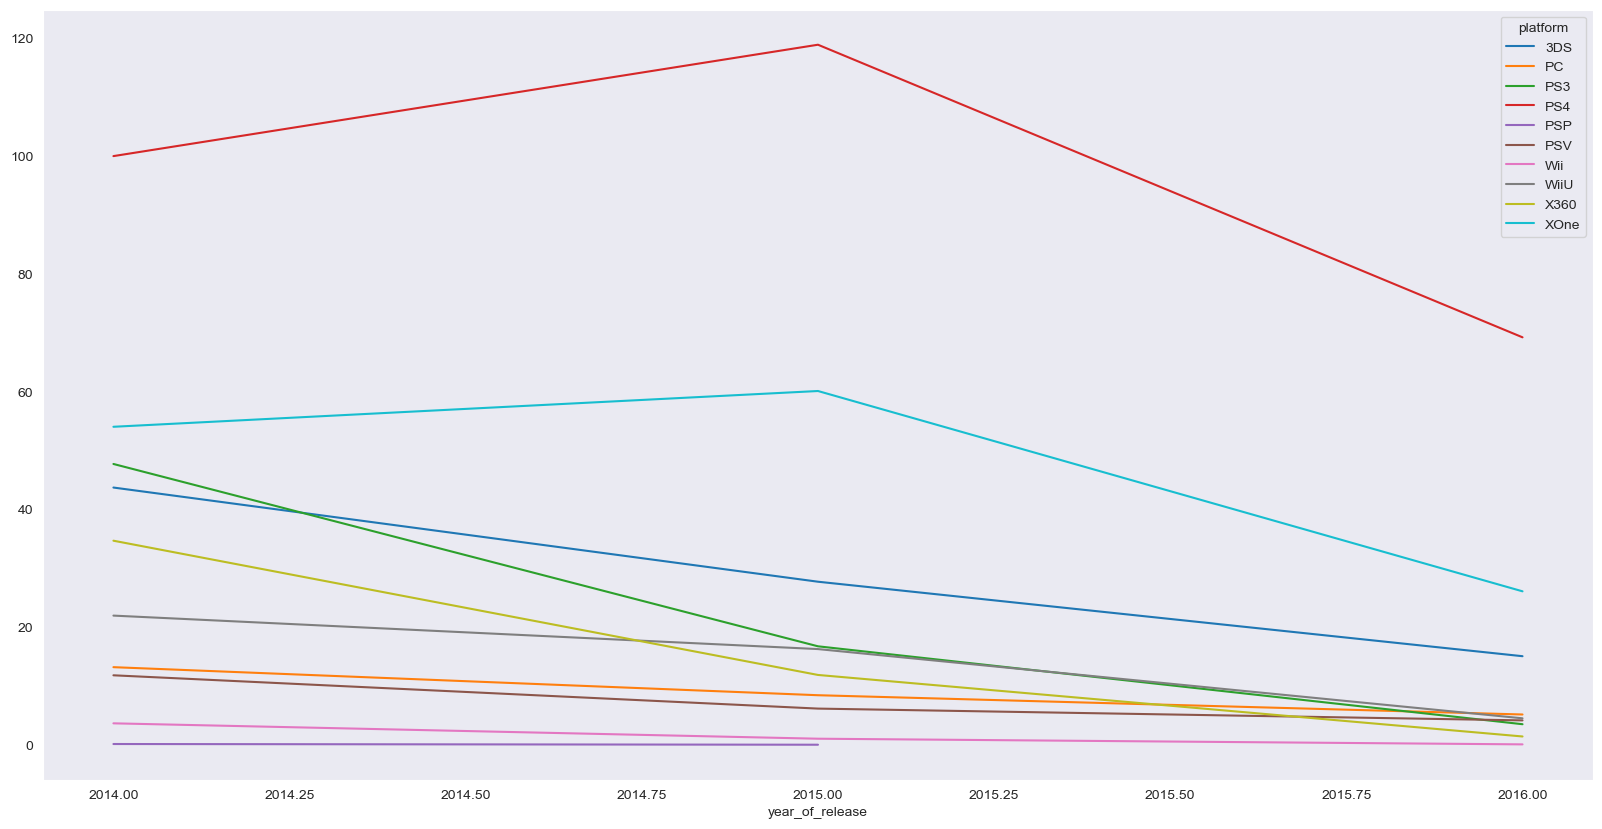

In [19]:
actual_data = data.query('year_of_release > 2013')
# выбираем данные за последние три года, чтобы выявить платформы продажи игр на которых будут расти
actual_data_pivot = actual_data.pivot_table(index = 'year_of_release', values = 'world_sales',columns = 'platform', aggfunc = 'sum')
actual_data_pivot.plot(figsize = (20,10));

Вывод: Просматривается тенденция снижению продаж, потенциальный рост виден у PS4 и XOne. Так же PC показывает стабильные продажи на протяжении почти 30ти лет. График PS4 отличается от XOne тем что продажи в течении всего периода у PS4 выше чем у XOne, так же и снижение продаж у PS4 показывает более резкий отрицательный рост. Схожи графики лишь пиком продаж, а именно начало 2015года. В проекте представленны данные до 2016года.

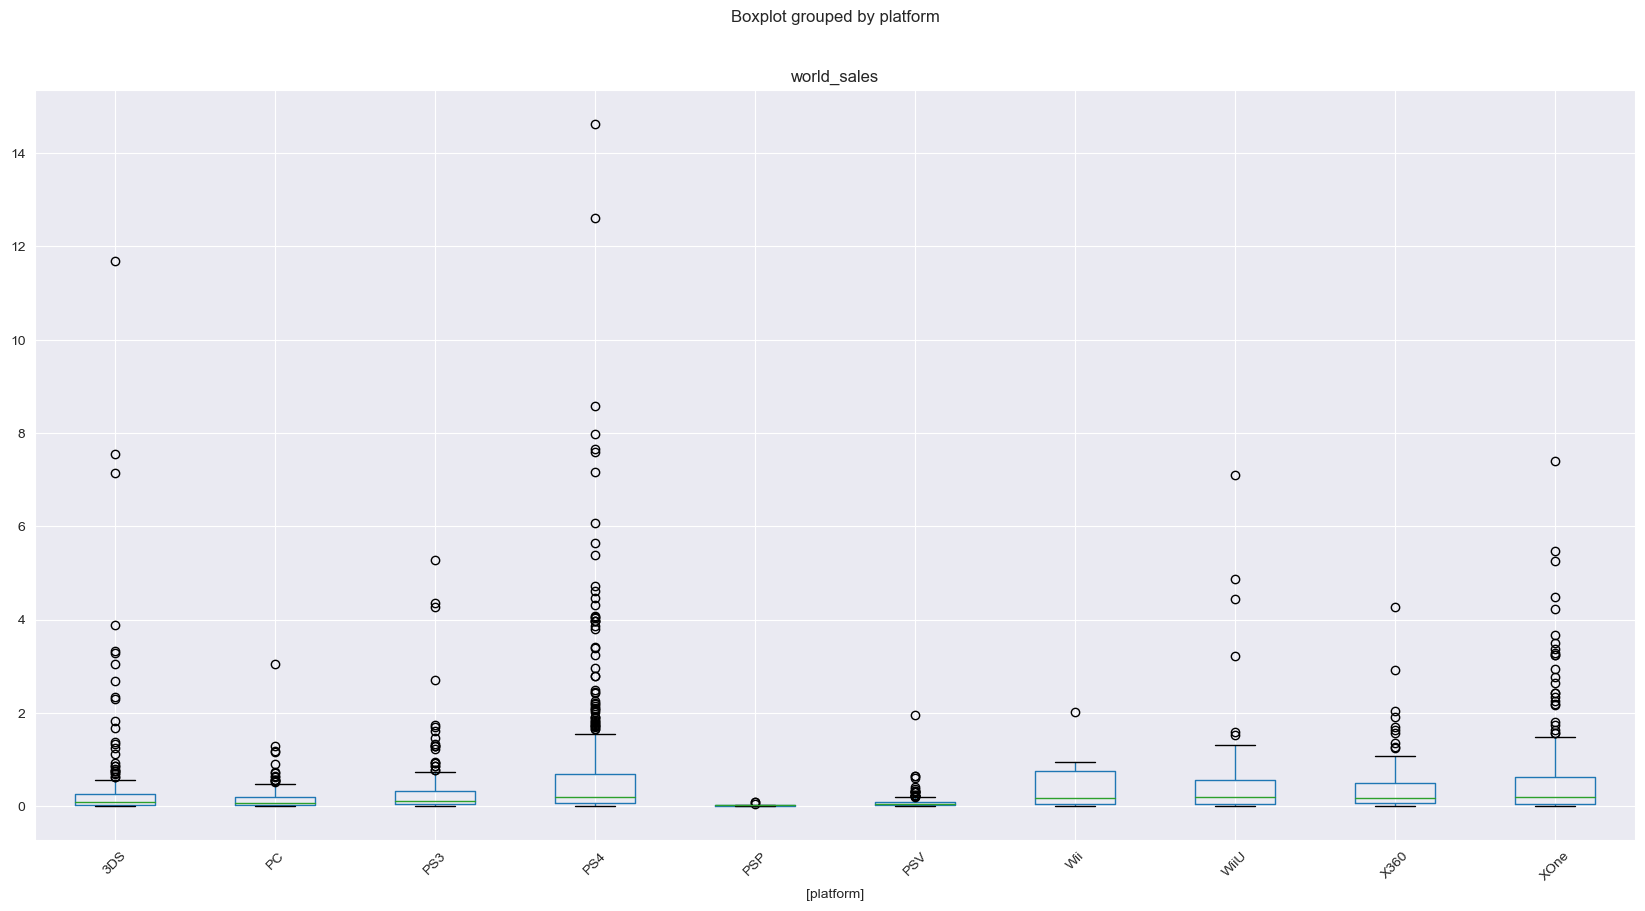

In [20]:
actual_data.boxplot(column = ['world_sales'],by = ['platform'],rot=45, figsize = (20,10));
#строим ящик с усами для мировых продаж с разбивкой на платформы

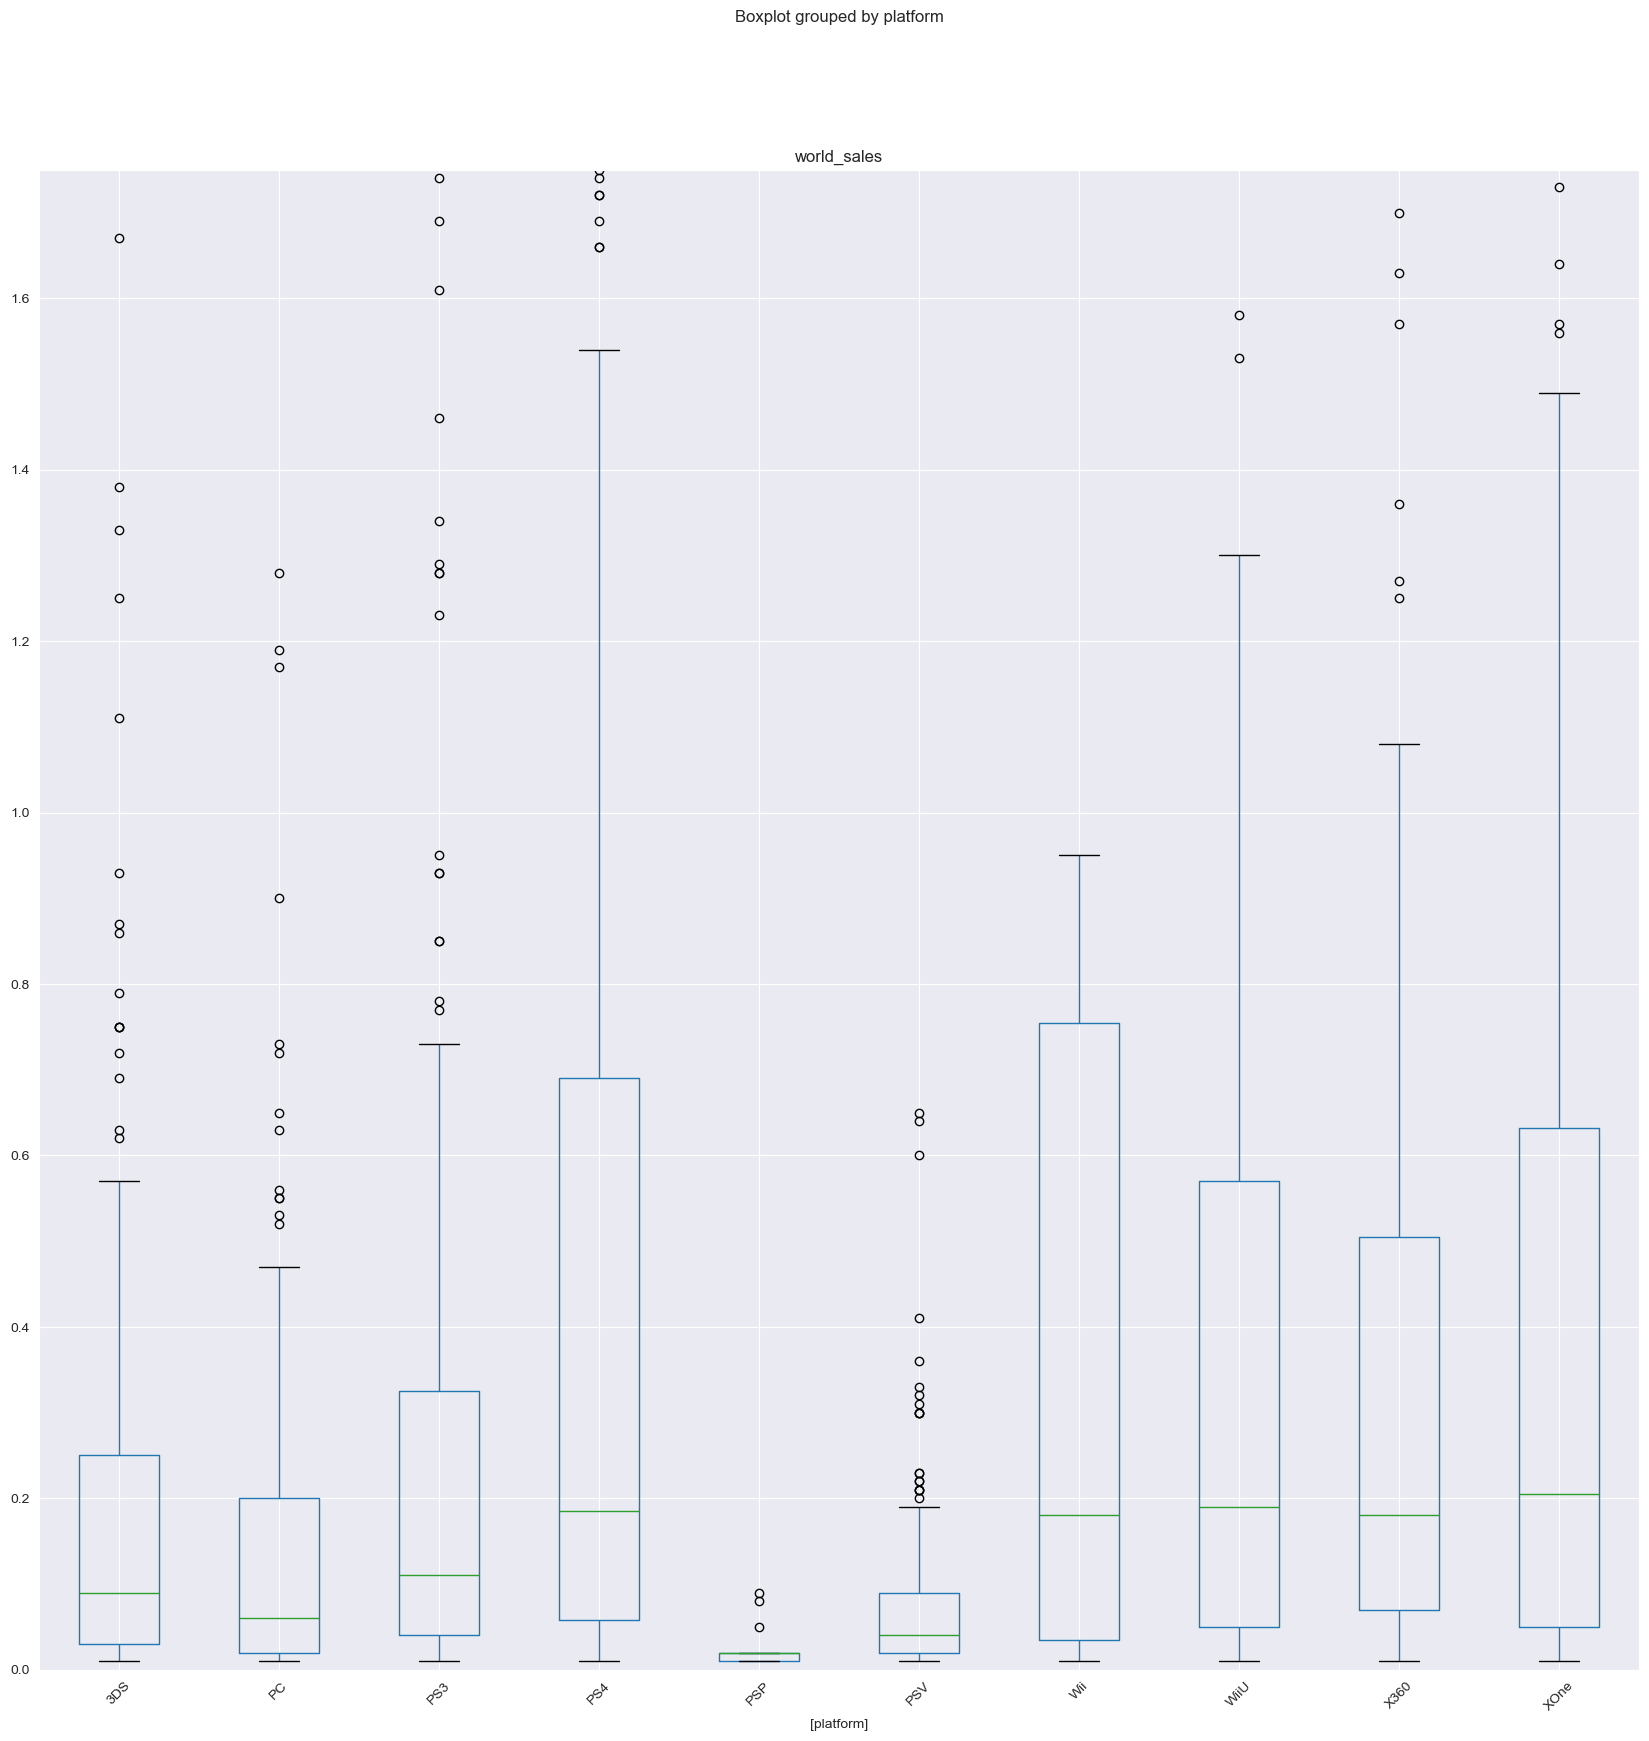

In [21]:
actual_data.boxplot(column = ['world_sales'],by = ['platform'],rot=45, figsize = (20,20));
plt.ylim(0,1.75);

In [22]:
actual_data_pivot.describe()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28.893333,9.016667,22.726667,96.050000,0.180000,7.466667,1.690000,14.326667,16.073333,46.786667
std,14.342445,4.037974,22.664795,25.059579,0.084853,3.967472,1.847458,8.889411,16.987694,18.127748
min,15.140000,5.250000,3.600000,69.250000,0.120000,4.250000,0.180000,4.600000,1.520000,26.150000
25%,21.460000,6.885000,10.210000,84.625000,0.150000,5.250000,0.660000,10.475000,6.740000,40.110000
50%,27.780000,8.520000,16.820000,100.000000,0.180000,6.250000,1.140000,16.350000,11.960000,54.070000
75%,35.770000,10.900000,32.290000,109.450000,0.210000,9.075000,2.445000,19.190000,23.350000,57.105000
max,43.760000,13.280000,47.760000,118.900000,0.240000,11.900000,3.750000,22.030000,34.740000,60.140000


Вывод: Как мы видим самые большие выбросы у PS4, затем 3DS. Рассмотрев график по ближе мы видим что по максимальным значениям не учитывая выбросы лидирует так же PS4 на втором месте XOne, по первому квартилю Wii, что говорит о том что большинство игр данной платформы продавались очень хорошо. Если смотреть по медиане мы видим что XOne и Wii лидируют.

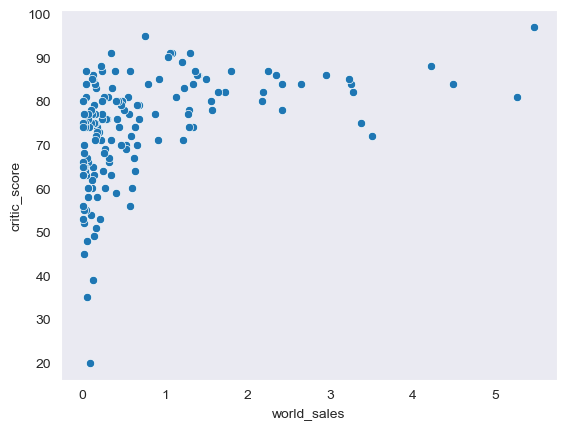

In [23]:
popular_platform = actual_data.query('platform == "XOne"')
#В качестве одной из популярных платформ мы выбрали иксбокс 360
sns.scatterplot(data=popular_platform, x = 'world_sales', y = 'critic_score');

In [24]:
popular_platform['world_sales'].corr(popular_platform['critic_score'])

0.42867694370333226

Вывод: между переменными наблюдается слабая корреляция.

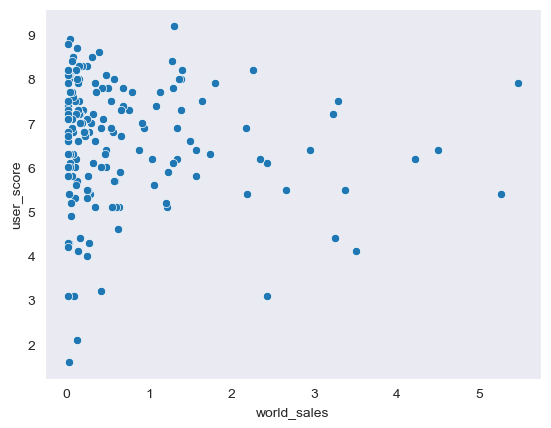

In [25]:
sns.scatterplot(data=popular_platform, x = 'world_sales', y = 'user_score');

In [26]:
popular_platform['world_sales'].corr(popular_platform['user_score'])

-0.0703839280647581

Вывод: слабая  отрицательная корреляция.

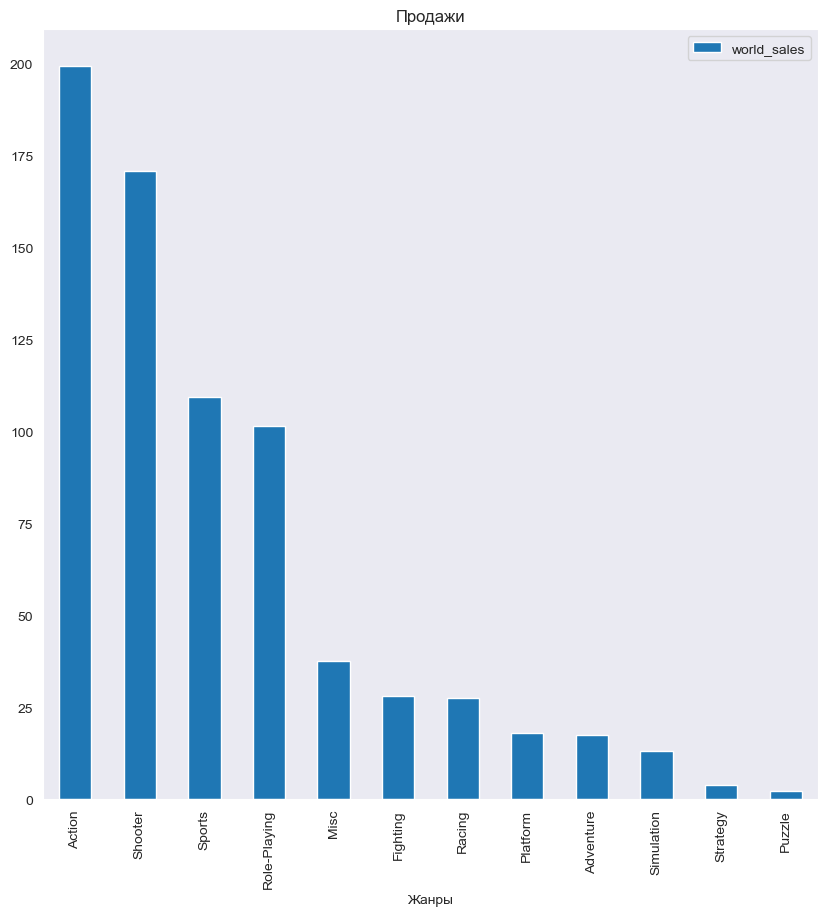

In [27]:
genre_pivot = actual_data.pivot_table(index = 'genre', values = 'world_sales', aggfunc = 'sum')
genre_pivot = genre_pivot.sort_values(by = 'world_sales', ascending = False)
genre_pivot.plot(kind = 'bar', figsize = (10,10));
plt.title('Продажи');
plt.xlabel('Жанры');

Вывод: Мы видим что самые высокие продажи у Экшен игр, на втором месте шутеры, разница между самыми продаваемыми и игр с низкими продажами значительная. Загадки продаются хуже всего.

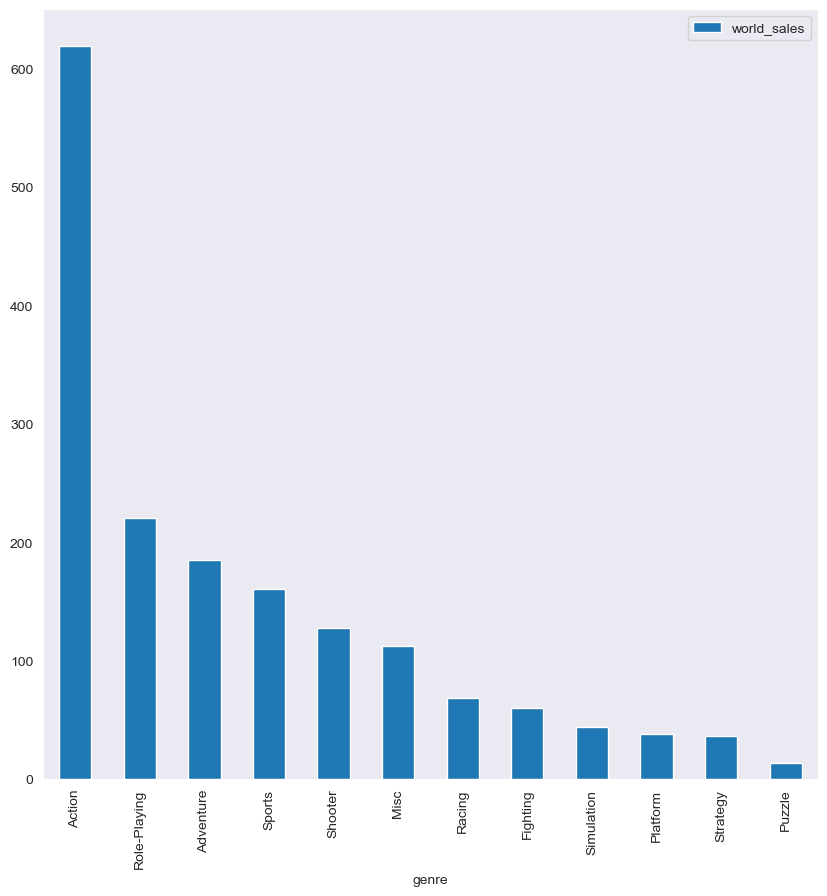

In [28]:
count_pivot = actual_data.pivot_table(index = 'genre' , values = 'world_sales',aggfunc = 'count')
count_pivot = count_pivot.sort_values(by = 'world_sales', ascending = False)
count_pivot.plot(kind = 'bar', figsize = (10,10));

Вывод: количество игр по жанрам значительно отличается, будем смотреть медиану.

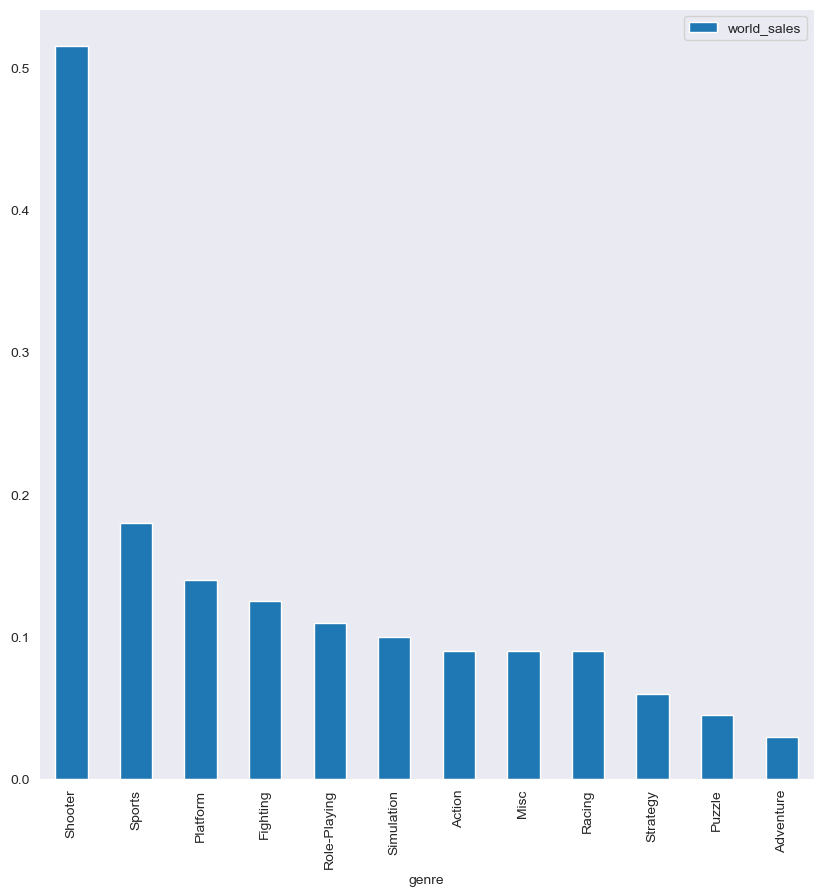

In [29]:
median_pivot = actual_data.pivot_table(index = 'genre' , values = 'world_sales',aggfunc = 'median')
median_pivot = median_pivot.sort_values(by = 'world_sales', ascending = False)
median_pivot.plot(kind = 'bar', figsize = (10,10));

Вывод: если смотреть по медиане, на первом месте шутеры затем спортивные игры, экшн только на пятом месте, на последнем так же головоломки.

<div class="alert alert-info">
   
</div>

## Портрет пользователя каждого региона

<div class="alert alert-info">
   Изменения после 2-ой проверки ревьюера
</div>

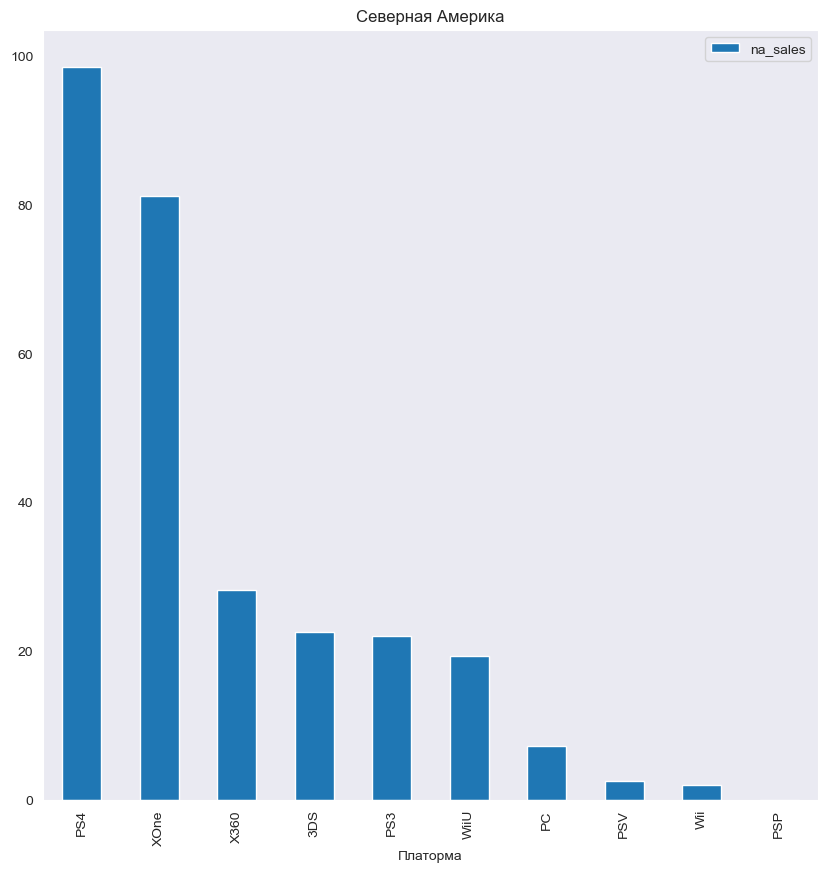

In [30]:
na_sales_pivot = actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
na_sales_pivot = na_sales_pivot.sort_values(by = 'na_sales', ascending = False)
na_sales_pivot.plot(kind = 'bar', figsize = (10,10));
plt.title('Северная Америка');
plt.xlabel('Платорма');

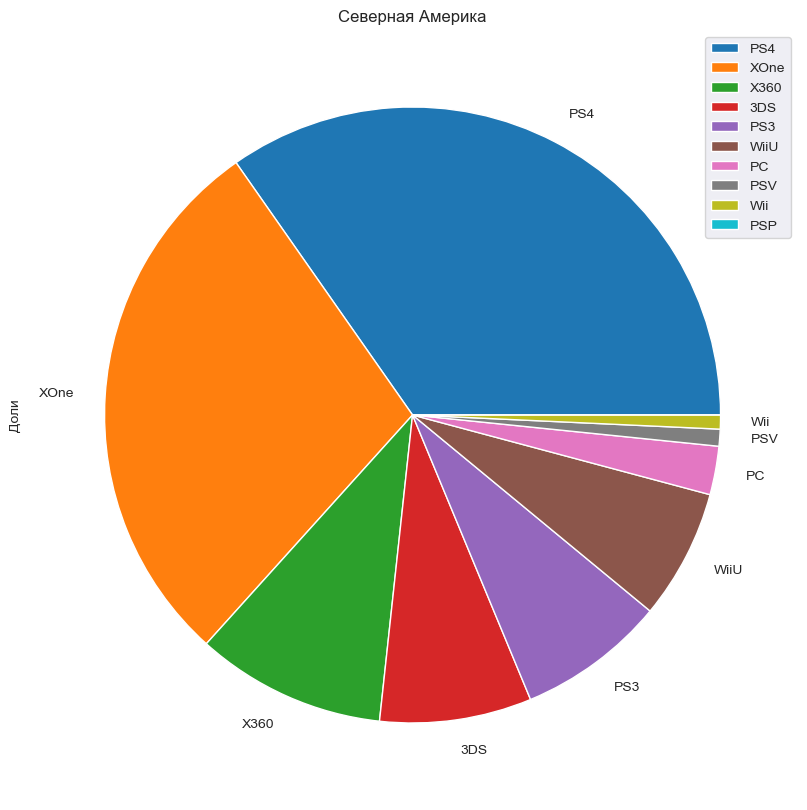

In [31]:
na_sales_pivot['percent'] = na_sales_pivot['na_sales']/na_sales_pivot['na_sales'].sum()

na_sales_pivot.plot(y='percent', kind='pie', figsize = (10,10))
plt.title('Северная Америка');
plt.ylabel('Доли');

In [32]:
na_sales_pivot

,na_sales,percent
platform,,
PS4,98.61,0.347145
XOne,81.27,0.286102
X360,28.30,0.099627
3DS,22.64,0.079701
PS3,22.05,0.077624
WiiU,19.36,0.068155
PC,7.23,0.025452
PSV,2.52,0.008871
Wii,2.08,0.007322


Вывод: ТОП-5 по долям продаж в северной Америке: PS4;XOne;3DS;PS3.

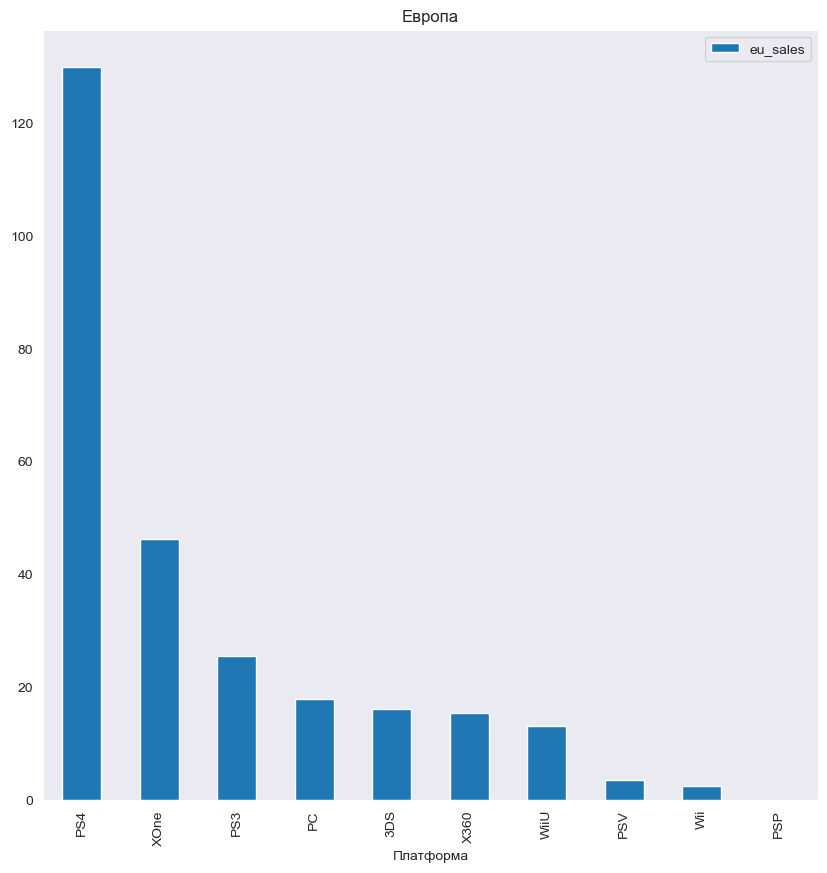

In [33]:
eu_sales_pivot = actual_data.pivot_table(index = 'platform', values = 'eu_sales',aggfunc = 'sum')
eu_sales_pivot = eu_sales_pivot.sort_values(by = 'eu_sales', ascending = False)
eu_sales_pivot.plot(kind = 'bar', figsize = (10,10)); 
plt.title('Европа');
plt.xlabel('Платформа');

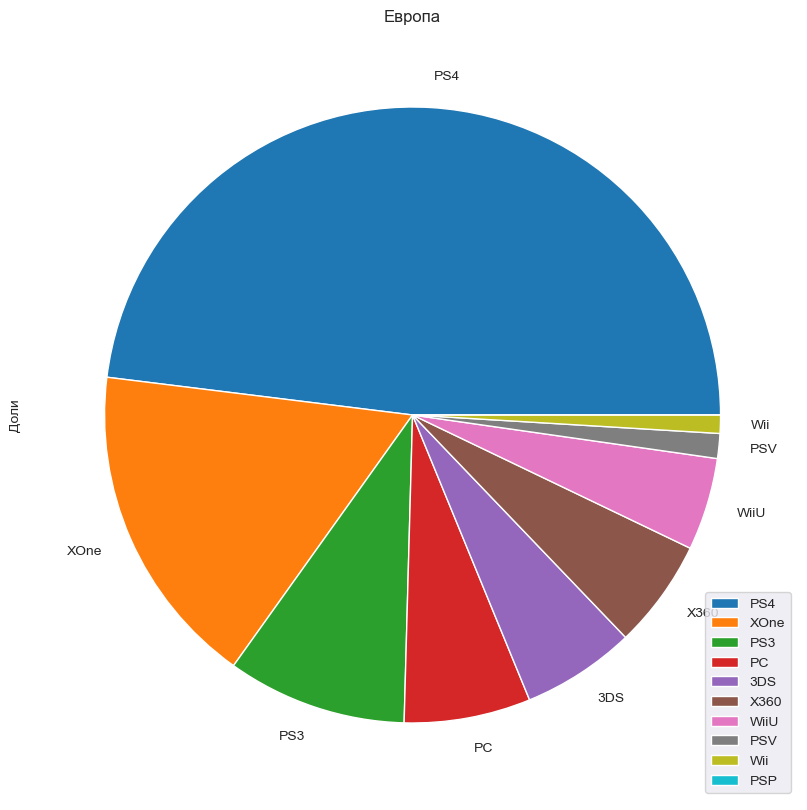

In [34]:
eu_sales_pivot['percent'] = eu_sales_pivot['eu_sales']/eu_sales_pivot['eu_sales'].sum()

eu_sales_pivot.plot(y='percent', kind='pie', figsize = (10,10))
plt.title('Европа');
plt.ylabel('Доли');

In [35]:
eu_sales_pivot

,eu_sales,percent
platform,,
PS4,130.04,0.480420
XOne,46.25,0.170866
PS3,25.54,0.094355
PC,17.97,0.066388
3DS,16.12,0.059554
X360,15.49,0.057226
WiiU,13.15,0.048581
PSV,3.53,0.013041
Wii,2.59,0.009568


Вывод: ТОП-5 по долям продаж в Европе: PS4;XOne;PS3;PC.

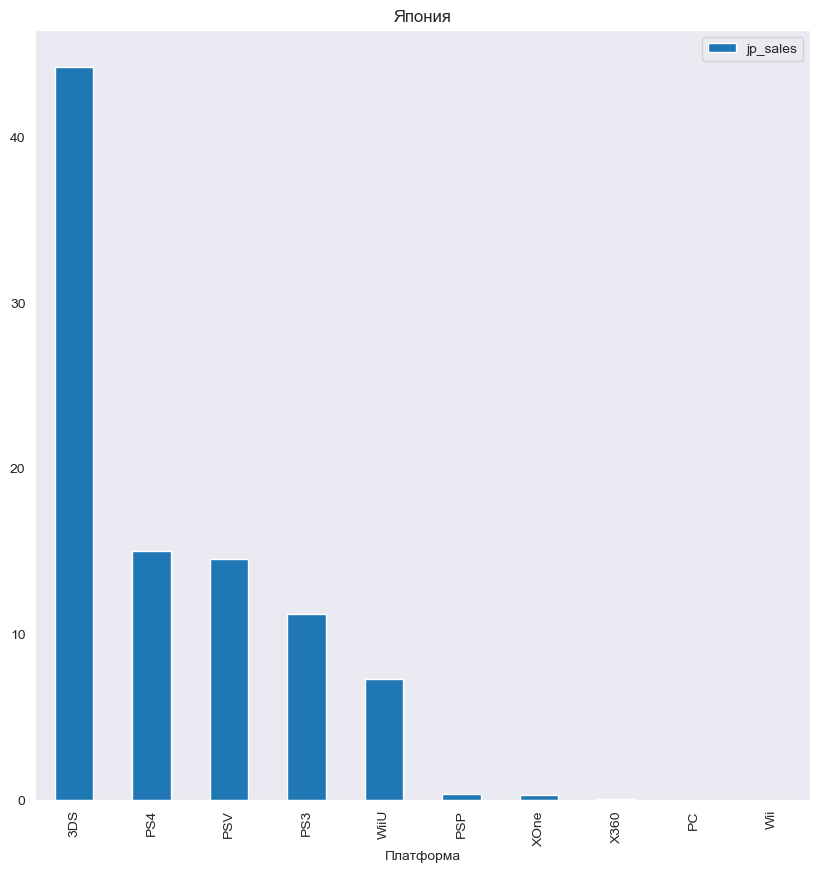

In [36]:
jp_sales_pivot = actual_data.pivot_table(index = 'platform', values = 'jp_sales',aggfunc = 'sum')
jp_sales_pivot = jp_sales_pivot.sort_values(by = 'jp_sales', ascending = False)
jp_sales_pivot.plot(kind = 'bar', figsize = (10,10));
plt.title('Япония');
plt.xlabel('Платформа');

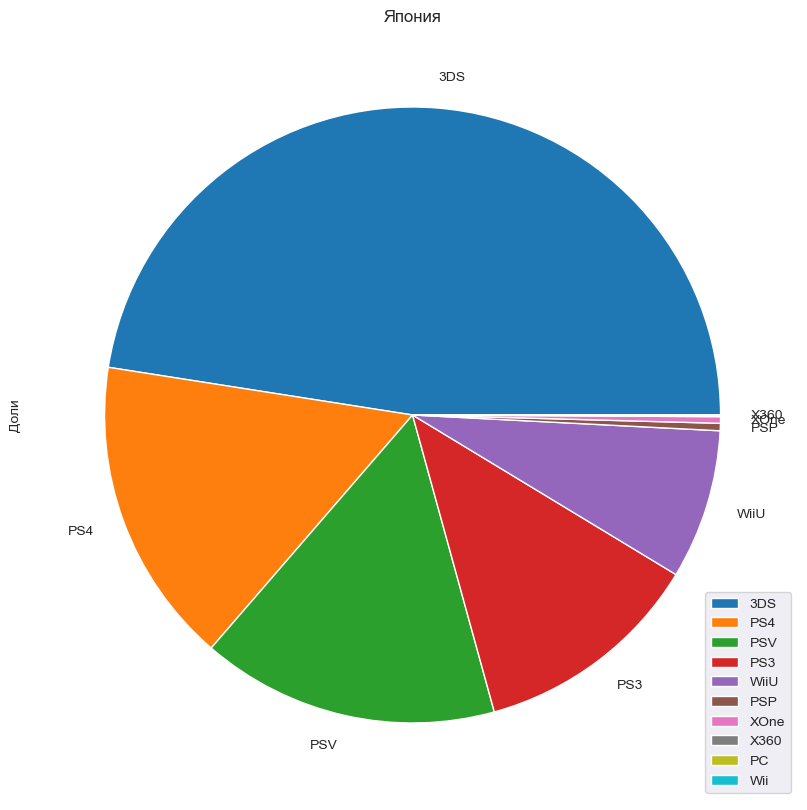

In [37]:
jp_sales_pivot['percent'] = jp_sales_pivot['jp_sales']/jp_sales_pivot['jp_sales'].sum()

jp_sales_pivot.plot(y='percent', kind='pie', figsize = (10,10))
plt.title('Япония');
plt.ylabel('Доли');

In [38]:
jp_sales_pivot

,jp_sales,percent
platform,,
3DS,44.24,0.475239
PS4,15.02,0.161349
PSV,14.54,0.156193
PS3,11.22,0.120529
WiiU,7.31,0.078526
PSP,0.36,0.003867
XOne,0.32,0.003438
X360,0.08,0.000859
PC,0.00,0.000000


Вывод: ТОП-5 по долям продаж в северной Японии: 3DS;PS4;PSV;PS3.

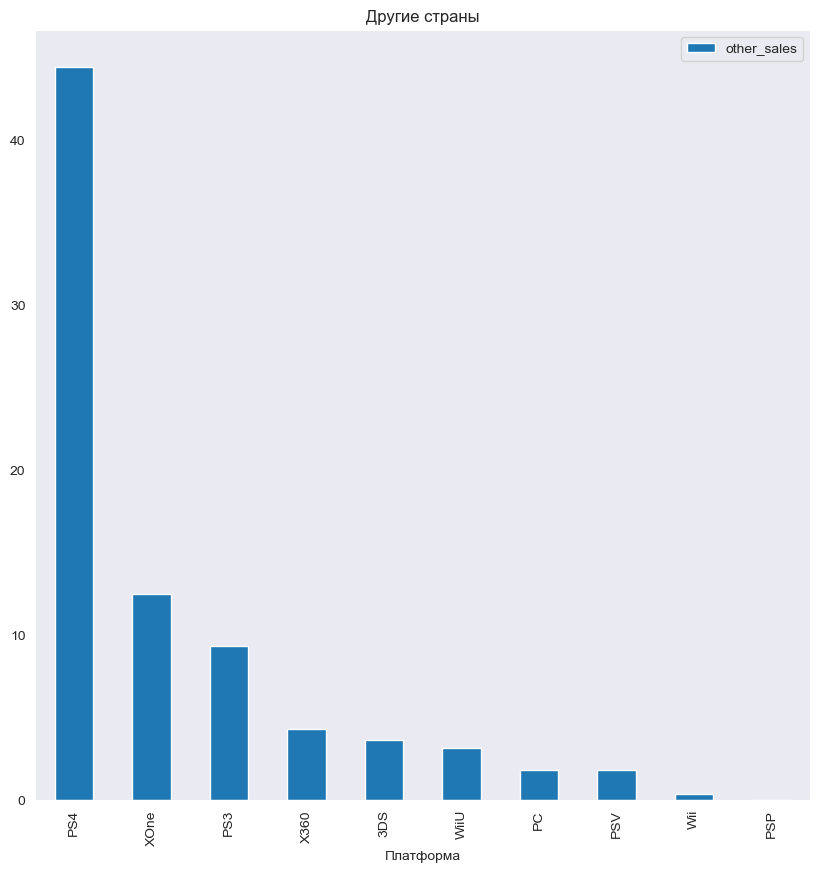

In [39]:
other_sales_pivot = actual_data.pivot_table(index = 'platform', values = 'other_sales',aggfunc = 'sum')
other_sales_pivot = other_sales_pivot.sort_values(by = 'other_sales', ascending = False)
other_sales_pivot.plot(kind = 'bar', figsize = (10,10));
plt.title('Другие страны');
plt.xlabel('Платформа');

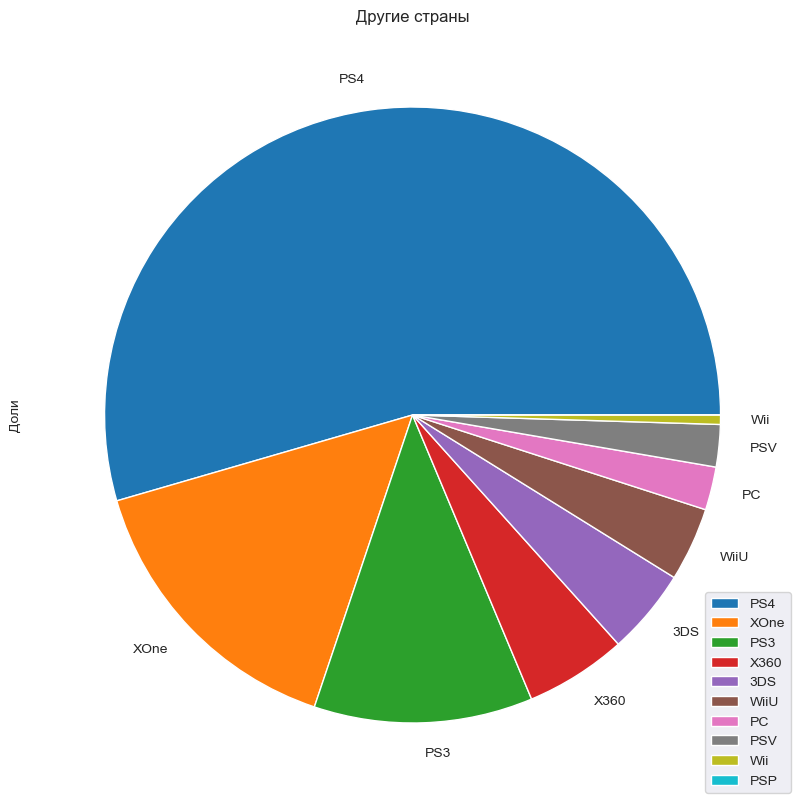

In [40]:
other_sales_pivot['percent'] = other_sales_pivot['other_sales']/other_sales_pivot['other_sales'].sum()

other_sales_pivot.plot(y='percent', kind='pie', figsize = (10,10))
plt.title('Другие страны');
plt.ylabel('Доли');

In [41]:
other_sales_pivot

,other_sales,percent
platform,,
PS4,44.48,0.544964
XOne,12.52,0.153394
PS3,9.37,0.114800
X360,4.35,0.053296
3DS,3.68,0.045087
WiiU,3.16,0.038716
PC,1.85,0.022666
PSV,1.81,0.022176
Wii,0.40,0.004901


Вывод: ТОП-5 по долям продаж в других странах: PS4;XOne;PS3;X360.

Вывод: Лидеры в основном везде одни и те же, в японии лидируют более старые платформы в Европе и Северной Америке консоли новее.

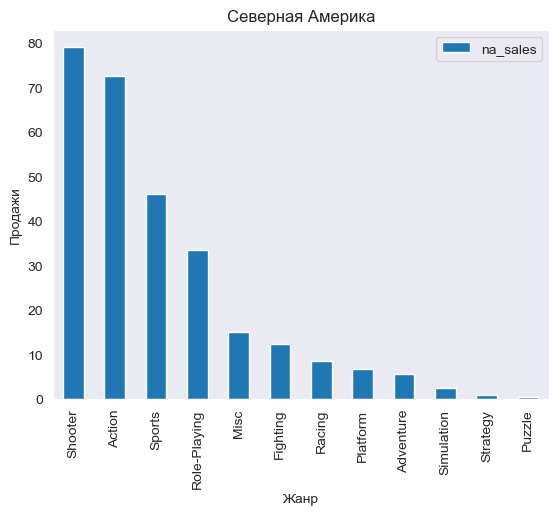

In [42]:
na_sales_pivot_genre = actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
na_sales_pivot_genre = na_sales_pivot_genre.sort_values(by = 'na_sales', ascending = False)
na_sales_pivot_genre.plot(kind = 'bar');
plt.title('Северная Америка');
plt.xlabel('Жанр');
plt.ylabel('Продажи');

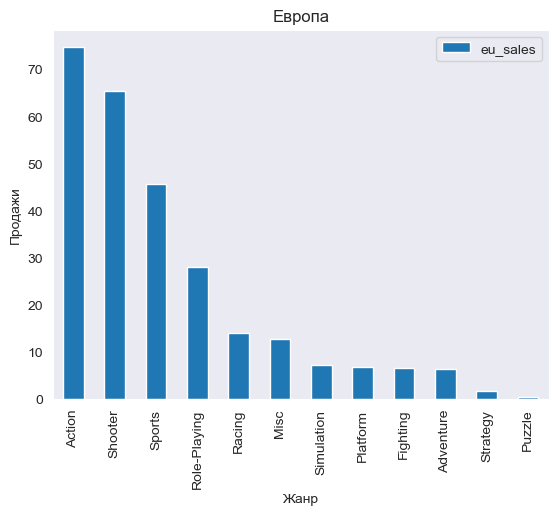

In [43]:
eu_sales_pivot_genre = actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
eu_sales_pivot_genre = eu_sales_pivot_genre.sort_values(by = 'eu_sales', ascending = False)
eu_sales_pivot_genre.plot(kind = 'bar');
plt.title('Европа');
plt.xlabel('Жанр');
plt.ylabel('Продажи');

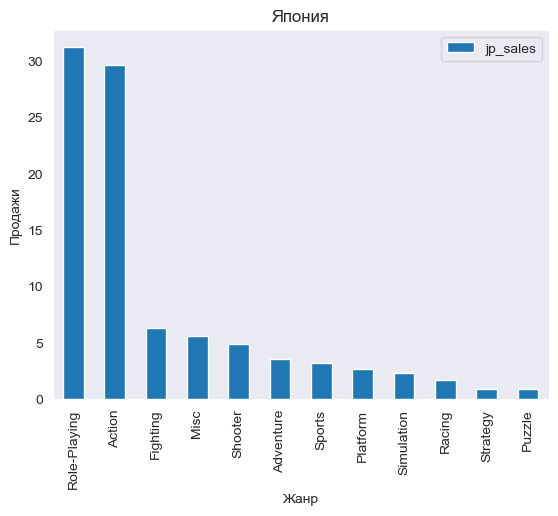

In [44]:
jp_sales_pivot_genre = actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
jp_sales_pivot_genre = jp_sales_pivot_genre.sort_values(by = 'jp_sales', ascending = False)
jp_sales_pivot_genre.plot(kind = 'bar');
plt.title('Япония');
plt.xlabel('Жанр');
plt.ylabel('Продажи');

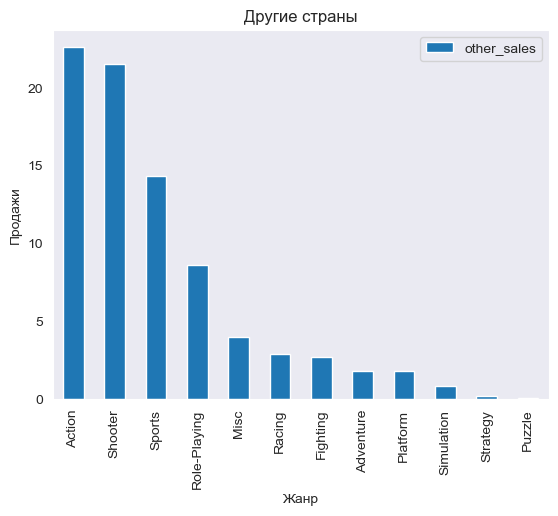

In [45]:
other_sales_pivot_genre = actual_data.pivot_table(index = 'genre', values = 'other_sales', aggfunc = 'sum')
other_sales_pivot_genre = other_sales_pivot_genre.sort_values(by = 'other_sales', ascending = False)
other_sales_pivot_genre.plot(kind = 'bar');
plt.title('Другие страны');
plt.xlabel('Жанр');
plt.ylabel('Продажи');

Вывод: Во всех странах, кроме Японии и стран северной Америки по продажам лидируют экшн игры. В Японии на первом месте ролевые игры, в северной Америке - шутеры.

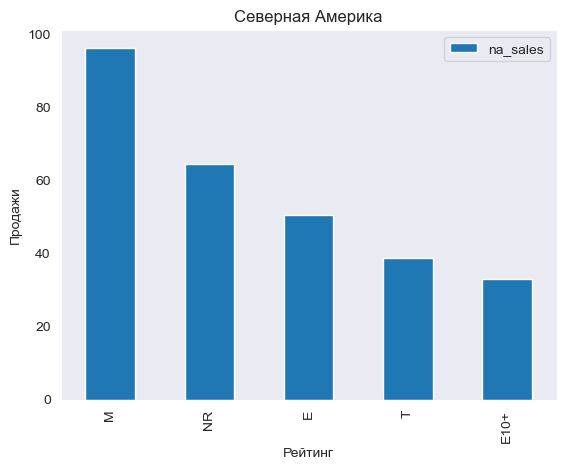

In [46]:
na_rating_pivot = actual_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
na_rating_pivot = na_rating_pivot.sort_values(by = 'na_sales', ascending = False)
na_rating_pivot.plot(kind = 'bar');
plt.title('Северная Америка');
plt.xlabel('Рейтинг');
plt.ylabel('Продажи');

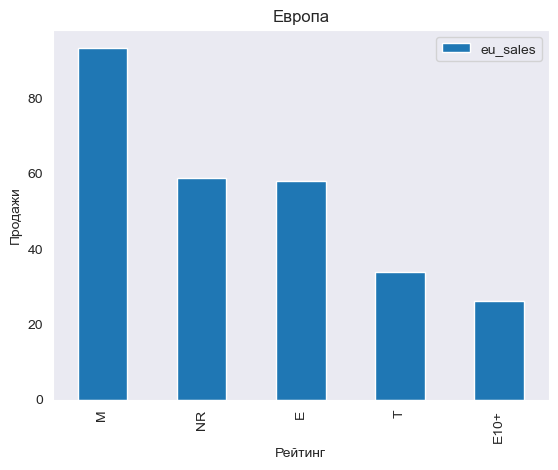

In [47]:
eu_rating_pivot = actual_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
eu_rating_pivot = eu_rating_pivot.sort_values(by = 'eu_sales', ascending = False)
eu_rating_pivot.plot(kind = 'bar');
plt.title('Европа');
plt.xlabel('Рейтинг');
plt.ylabel('Продажи');

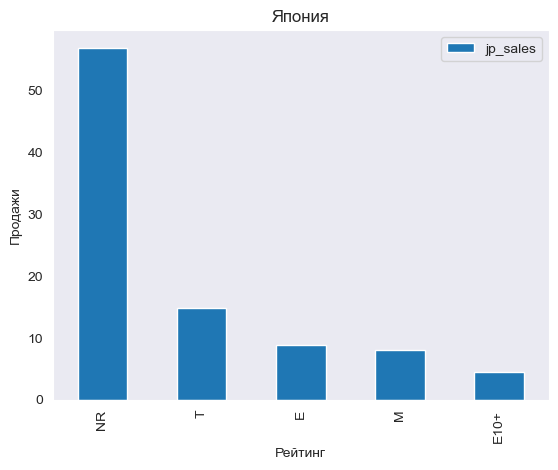

In [48]:
jp_rating_pivot = actual_data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
jp_rating_pivot = jp_rating_pivot.sort_values(by = 'jp_sales', ascending = False)
jp_rating_pivot.plot(kind = 'bar');
plt.title('Япония');
plt.xlabel('Рейтинг');
plt.ylabel('Продажи');

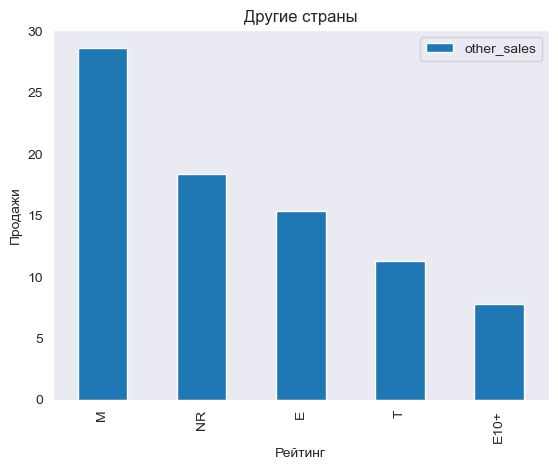

In [49]:
other_rating_pivot = actual_data.pivot_table(index = 'rating', values = 'other_sales', aggfunc = 'sum')
other_rating_pivot = other_rating_pivot.sort_values(by = 'other_sales', ascending = False)
other_rating_pivot.plot(kind = 'bar');
plt.title('Другие страны');
plt.xlabel('Рейтинг');
plt.ylabel('Продажи');

Вывод: 
    рейтинг ESRB, так же во всех странах кроме Японии, на первом месте М.
    «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
    В Японии на первом месте рейтинг Т.
    «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

## Проверка гипотез

### Проверяем гипотизу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза - гипотеза в которой cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативной будет гипотеза в кторой пользовательские рейтинги разные.

In [50]:
#Делаем срез данных, хотим получить только данные по платформе иксбокс
data_xbox = actual_data.query('platform == "XOne"')
#Так же для рейтингов платформы ПК
data_pc = actual_data.query('platform == "PC"')


alpha = 0.05 #Вероятность правильного вывода около 95%
results = st.ttest_ind(data_pc['user_score'],data_xbox['user_score'],nan_policy='omit')
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза не верна')
else:
    print('Нулевая гипотеза верна')

p-value: 0.10450507919348513
Нулевая гипотеза верна


Вывод:Нулевая гипотеза верна.

### Гипотеза: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза - гипотеза в которой cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. Альтернативной будет гипотеза в кторой пользовательские рейтинги разные.

In [51]:

action = actual_data.query('genre == "Action"')

sports = actual_data.query('genre == "Sports"')

alpha = 0.05
results = st.ttest_ind(action['user_score'],sports['user_score'],nan_policy='omit')
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза не верна')
else:
    print('Нулевая гипотеза верна')

p-value: 2.8711147985107304e-19
Нулевая гипотеза не верна


Вывод: Нулевая гипотеза не верна. Рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Общий вывод

Вывод:
Мы изучили общую информацию в данных по компьютерным играм. Данные предоставлены в период с 1980 по 2016 год. В ходе проверки мы выявили что в данных есть пропуски а так же несоответствия форматов. Мы удалили данные с пропусками названий игр, так как их было очень мало и их отсутствие не сильно повлияет на общую картину. Мы измненили формат данных, год и пользовательский рейтинг. В ходе исследовательского анализа данных мы увидели что максимальное количество игр было разработано в 2008 и 2009м годах. Так же выявили топ самых продаваемых игр по платформам, самыми продаваемыми оказались игры для PS2, XBOX360,PS3. В ходе исследования мы так же выяснили среднюю продолжительность "жизни" платформ, а именно продаваемость игр доходящих до пиковых зачений и убывание, в срднем такой цикл длится около 7 лет для каждой платформы. Мы выявили потенциальный рост продаж игр у платформ PSV и PC. Выявили что у оценок пользователей есть взаимосвязь с количеством продаж, а именно чем выше оценки тем больше продажи, так же и с оценками критиков. Мы увидели что среди жанров по продажам в мире лидируют экшен игры, потом шутеры и спортивные. Затем мы попытались определить портрет пользователя каждого региона, обнаружили что лидеры продаж по платформам схожи у всех регионов, одни и те же платформы находятся в топе, кроме Японии. Когда мы решили сравнить продажи по жанрам то обнаружили что ситуация схожая во всех регионах кроме Японии, там на первом месте ролевые игры. Так же мы определили что в японии самые высокии продажи игр с рейтингом ESRB - "T", в то время как у всех стран "М". Мы осуществили проверку гипотез по итогам исследовательского анализа и оказалось что, гипотиза - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые, верна. Так же гипотеза - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, верна.